train fold 1
R-squared 0.9922534192213657
R 0.9961191792257419
mae 101.01851851851852
rmse 1490.9135218481417
#########################################
test fold 1
温州市   real: 504   pre:98.0
[[4.60179338]]
[2.82252702]
[ 0.02718471  0.03264358 -0.02125985 -0.01050938  0.21486585  1.54195484
  0.00398161  0.00474428 -0.01433928]
宜昌市   real: 931   pre:814.0
[[6.7035457]]
[2.82252702]
[ 1.20650837e-02  8.80635231e-03 -2.05858717e-02 -1.04102731e-02
 -3.28016580e-02  4.02375550e+00  8.64512163e-04  7.96423648e-02
 -1.80317338e-01]
孝感市   real: 3518   pre:1680.0
[[7.42765233]]
[2.82252702]
[ 0.         -0.01667055 -0.00922439 -0.01041027 -0.03896716  4.71137804
  0.01046658 -0.01336815 -0.02807879]
恩施土家族苗族自治州   real: 252   pre:511.0
[[6.24023081]]
[2.82252702]
[ 1.20650837e-02  4.17967298e-02 -1.62514268e-02 -1.04102731e-02
 -4.65739918e-02  3.63125453e+00  8.64512163e-04 -5.53513846e-02
 -1.39689997e-01]
长沙市   real: 242   pre:161.0
[[5.08888026]]
[2.82252702]
[-0.02850111 -0.10208797 -0.009

train fold 9
R-squared 0.9700167956575865
R 0.9848943068459612
mae 120.62153846153846
rmse 1819.2624879329535
#########################################
test fold 9
天津市   real: 136   pre:46.0
[[3.87012164]]
[2.89046563]
[-0.11612774 -0.04255588 -0.01015686  0.09619729  0.01515771  0.97520564
 -0.01744796  0.09780262 -0.01841882]
张家口市   real: 41   pre:10.0
[[2.40005064]]
[2.89046563]
[-1.12101442e-01  1.83979272e-04 -2.64881166e-03 -3.94782091e-03
  6.84938332e-02 -7.97177088e-01  2.97518988e-01  6.04127625e-02
 -1.14939405e-03]
淮安市   real: 66   pre:24.0
[[3.2222565]]
[2.89046563]
[-0.00750754 -0.00346266  0.02642335  0.25777372 -0.14911119 -0.64179256
  0.53682019  0.26703639  0.04561117]
新余市   real: 130   pre:11.0
[[2.49727384]]
[2.89046563]
[ 0.05501145  0.0089023   0.01636452 -0.05187759  0.18691265 -0.75861467
 -0.07720173  0.03224216  0.19506912]
潜江市   real: 198   pre:458.0
[[6.1296748]]
[2.89046563]
[ 0.02416225 -0.00670042  0.03930241  0.          0.10772039  3.24198166
 -0.02224

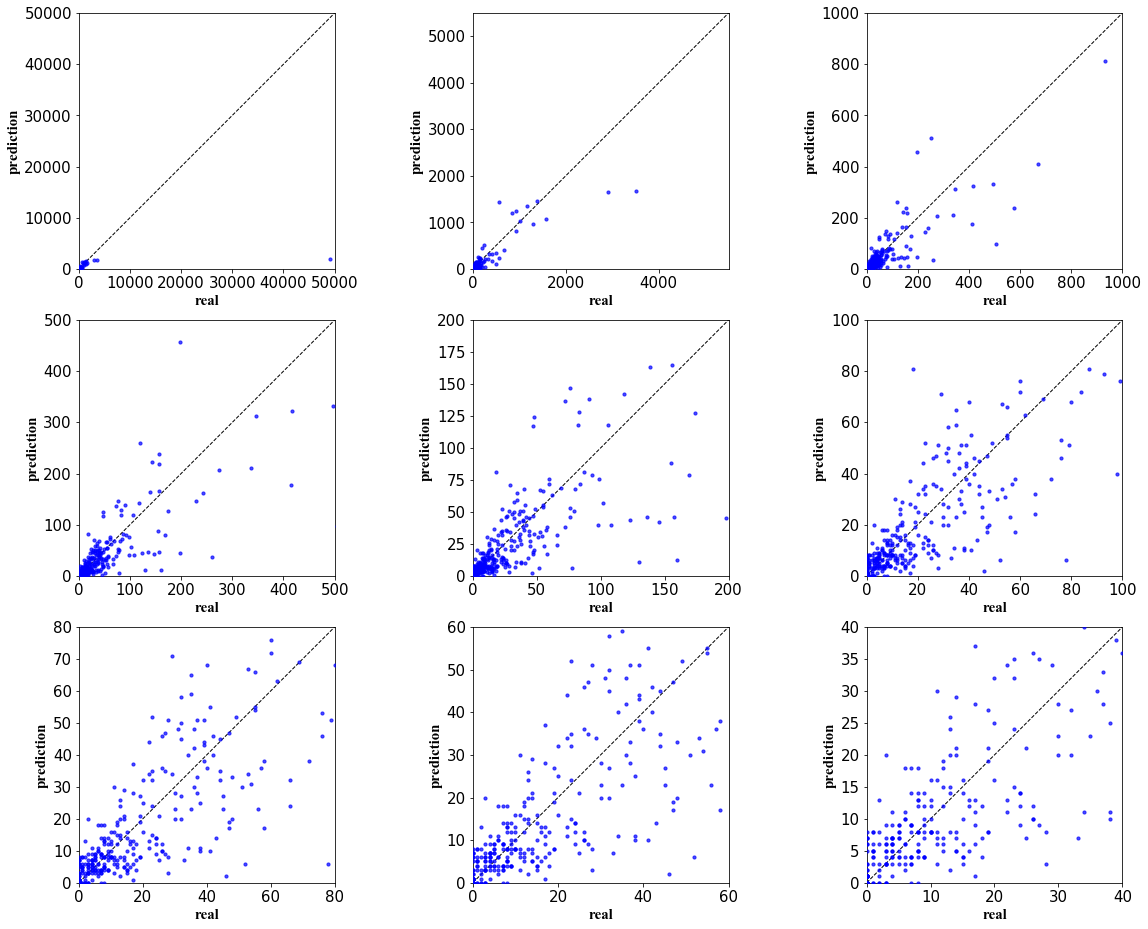

R-squared 0.7985386283992418
R 0.893609886023673
mae 36.46666666666667
rmse 141.91957816547605


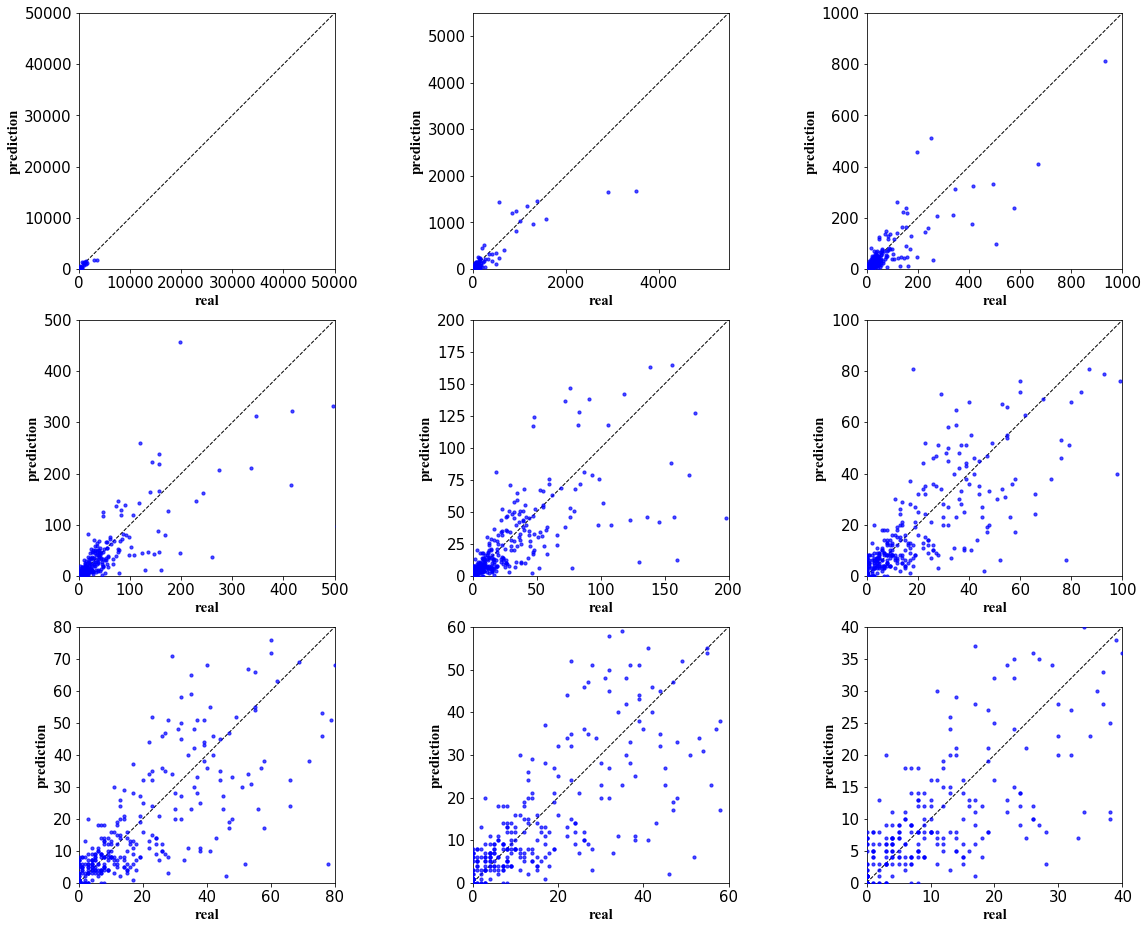

In [9]:
# -*- coding: utf-8 -*-
# @Author  : Qi Shao

"""
利用随机森林等机器学方法建模预测
"""

# load package
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
import scipy
import math
import geopandas as gp
from sklearn import preprocessing
from treeinterpreter import treeinterpreter as ti

# feature importance 特征重要性
def feture_importance(features, indices, importances):

    print("%%%%%% feature importances %%%%%%")

    '''
    for i in indices:
        print(features[i], importances[i])
    '''
    plt.rcParams['font.sans-serif']=['Times New Roman']#用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
    
    fig = plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importances[indices], color='dodgerblue', align='center')
    
    #设置横纵坐标的名称以及对应字体格式  
    font = {'family' : 'Times New Roman',  
    'weight' : 'normal',  
    'size'   : 25,  
    }

    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('feature Importance',font)
    plt.tick_params(labelsize=20)

    plt.savefig('./picture/feature_importance.eps', dpi=400)
    plt.show()

    aaaaa


# 评价指标
def evaluation(real_y, prediction_y):

    # rmse  mae  r2  r
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(real_y, prediction_y)
    print("R-squared", r_value**2)
    print("R", r_value)

    mae = mean_absolute_error(real_y, prediction_y)
    print("mae", mae)

    rmse = mean_squared_error(real_y, prediction_y) ** 0.5
    print("rmse", rmse)

def predict_plot(real_y, prediction_y):

    ############# 设置图例并且设置图例的字体及大小 #############
    font1 = {'family': 'Times New Roman',
            'weight': 'normal',
            'size': 15,
            }
    
    figsize = 20,16
    figure, ax = plt.subplots(figsize=figsize)
    level = [50000, 5500, 1000, 500, 200, 100, 80, 60, 40]
    for i in range(len(level)):

        plt.subplot(3,3,i+1)
        plt.scatter(real_y, prediction_y, c='b', marker='o', label='', s=10, alpha=0.7, zorder=20)
        plt.plot([0, 50000], [0, 50000], '--', color='black', label='', linewidth=1.0)
        
        ############# 设置坐标刻度值的大小以及刻度值的字体 #############
        plt.xlim(0, level[i])
        plt.ylim(0, level[i])
        plt.tick_params(labelsize=15)
        
        plt.ylabel('prediction', font1)
        plt.xlabel('real', font1)

        # x，y轴设置显示刻度一致
        ax = plt.gca()
        ax.set_aspect(1)
    
    plt.show()


# 疫情建模
def covid_all_predict(df, index, clf, threshold):
    
    '''
    df = df[['id','location',
    'rhMean','rhMax','rhMin',
    't2mMean','t2mMax','t2mMin',
    'moveInMean','moveInMax','moveInMin',
    'moveOutMea','moveOutMax','moveOutMin',
    'travelMean','travelMax','travelMin',
    'WuhanMean','WuhanMax','WuhanMin',
    'confirmed','confirmLog','npp']]
    'people', 'GDPTotal', 'GDPPerson',
    '''
    scale = preprocessing.StandardScaler()

    df = df[['id','location',
    'rhMean',
    't2mMean',
    'moveInMean',
    'moveOutMea',
    'travelMean',
    'WuhanMean', 
    'people', 'GDPTotal', 'DISTANCE',
    'confirmed','confirmLog']]

    real_y = []
    prediction_y = []
    df_predict = []

    case = []

    for i in range(len(index)):

        train_df = df.iloc[index[i][0], :]
        test_df = df.iloc[index[i][1], :]

        df_predict.extend(test_df['id'].to_list())

        train_y_log = train_df['confirmLog']
        train_y = train_df['confirmed']

        train_x = train_df.drop(['id', 'location', 'confirmLog', 'confirmed'], axis=1)

        test_y = test_df['confirmed']
        test_x = test_df.drop(['id', 'location', 'confirmLog', 'confirmed'], axis=1)

        scale_fit = scale.fit(train_x)
        train_x = scale_fit.transform(train_x)
        test_x = scale_fit.transform(test_x)

        clf[i].fit(train_x, train_y_log)

        predict_ytrain_log = clf[i].predict(train_x)
        predict_ytrain = np.trunc(np.exp(predict_ytrain_log) - 1)

        predict_ytest_log = clf[i].predict(test_x)
        predict_ytest = np.trunc(np.exp(predict_ytest_log) - 1)

        real_y.extend(test_y)
        prediction_y.extend(predict_ytest)

        print("train fold " + str(i+1))
        #print("预测误差较大城市，绝对值误差阈值设置为" + str(threshold))
        predict_train_y = list(predict_ytrain)
        train_yy = train_y.to_list()
        for j in range(len(train_df)):
            if abs(train_yy[j]-predict_train_y[j])>threshold:
                #print(train_df.iloc[j, 1] + "   real: " + str(train_yy[j]) + "   pre:" + str(predict_train_y[j]))
                pass

        evaluation(train_y, predict_ytrain)
        #predict_plot(train_y, predict_ytrain)

        print("#########################################")
        print("test fold " + str(i+1))
        #print("预测误差较大城市，绝对值误差阈值设置为" + str(threshold))
        predict_test_y = list(predict_ytest)
        test_yy = test_y.to_list()
        for j in range(len(test_df)):
            if abs(test_yy[j]-predict_test_y[j])>threshold:
                print(test_df.iloc[j, 1] + "   real: " + str(test_yy[j]) + "   pre:" + str(predict_test_y[j]))
                case.append(test_df.iloc[j, 0])
                prediction, bias, contributions = ti.predict(clf[i], test_x[j].reshape(1, -1))
                print(prediction)
                print(bias)
                print(contributions[0])

        evaluation(test_y, predict_ytest)
        #predict_plot(test_y, predict_ytest)
        print("                            ")
    

    df_predict = pd.DataFrame(df_predict)
    df_predict.columns = ['id']
    df_predict['predict'] = prediction_y

    print("************* cv evaluation ***************")
    evaluation(real_y, prediction_y)
    predict_plot(real_y, prediction_y)    

    return case, df_predict


# main
if __name__ == '__main__':


    df = gp.GeoDataFrame.from_file("../shp/china_city_distinct_COVID19.shp")
    #epidemicIds = [420100]
    #df = df[~df['id'].isin(epidemicIds)]
    
    
    kf = KFold(10, True)
    index = []
    for train_index, test_index in kf.split(df):
        index.append((train_index, test_index))

    clf = []
    for i in range(len(index)):
        clf.append(RandomForestRegressor(n_estimators=20, min_samples_split=5, max_depth=5))
        #clf.append(GradientBoostingRegressor(n_estimators=18, min_samples_split=5, min_samples_leaf=4, max_depth=4))
        #clf.append(svm.SVR(kernel='rbf', C=1.5, gamma=0.1))
        #clf.append(linear_model.Lasso(alpha=0.05))
        #clf.append(MLPRegressor(hidden_layer_sizes=(8, 6), alpha=0.1, solver='adam', max_iter=5000))
        #clf.append(linear_model.Lars(n_nonzero_coefs=5))

    
    # 全时间段建模
    case, df_predict = covid_all_predict(df, index, clf, threshold = 30)
    df = pd.merge(df, df_predict, how='inner', on='id')
    df['diff'] = df['confirmed'] - df['predict']
    
    #df.to_file("../result/COVID_rf.shp", encoding='utf-8')
    #df.to_file("../result/COVID_gbdt.shp", encoding='utf-8')
    #df.to_file("../result/COVID_svm.shp", encoding='utf-8')
    #df.to_file("../result/COVID_lasso.shp", encoding='utf-8')
    #df.to_file("../result/COVID_bp.shp", encoding='utf-8')
    #df.to_file("../result/COVID_lars.shp", encoding='utf-8')

    epidemicIds = [420100]
    df = df[~df['id'].isin(epidemicIds)]
    evaluation(df['confirmed'], df['predict'])
    predict_plot(df['confirmed'], df['predict'])